In [98]:
# Read in training and test datasets
library(readr)

# Classification Tree with rpart
library(rpart)

loans_training <- read_csv("https://raw.githubusercontent.com/mattcar265/IDS/main/Project%206/Loans_Training.csv", show_col_types = FALSE)
loans_test <- read_csv("https://raw.githubusercontent.com/mattcar265/IDS/main/Project%206/Loans_Test.csv", show_col_types = FALSE)

head(loans_training)


Approval,DebtToIncomeRatio,FICOScore,RequestAmount,Interest
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0,397,1000,450
FALSE,0,403,500,225
FALSE,0,408,1000,450
FALSE,0,408,2000,900
FALSE,0,411,5000,2250
FALSE,0,413,5000,2250


In [92]:
# Create CART model using training data that predicts Approval based on Debt-to-income Ratio, FICO score, and Request Amount
fit <- rpart(Approval ~ DebtToIncomeRatio + FICOScore + RequestAmount,
      method="class", data=loans_training)


In [93]:
# Description of splits
summary(fit)


Call:
rpart(formula = Approval ~ DebtToIncomeRatio + FICOScore + RequestAmount, 
    data = loans_training, method = "class")
  n= 150302 

         CP nsplit rel error    xerror        xstd
1 0.5646498      0 1.0000000 1.0057549 0.002582287
2 0.1267551      1 0.4353502 0.4353502 0.002130393
3 0.0100000      2 0.3085951 0.3089814 0.001865729

Variable importance
        FICOScore DebtToIncomeRatio 
               74                25 

Node number 1: 150302 observations,    complexity param=0.5646498
  predicted class=TRUE   expected loss=0.4994345  P(node) =1
    class counts: 75066 75236
   probabilities: 0.499 0.501 
  left son=2 (46002 obs) right son=3 (104300 obs)
  Primary splits:
      FICOScore         < 659.5 to the left,  improve=28208.770, (0 missing)
      DebtToIncomeRatio < 0.305 to the right, improve= 8986.886, (0 missing)
      RequestAmount     < 25500 to the right, improve= 1191.854, (0 missing)
  Surrogate splits:
      RequestAmount     < 1500  to the left,  agree=0

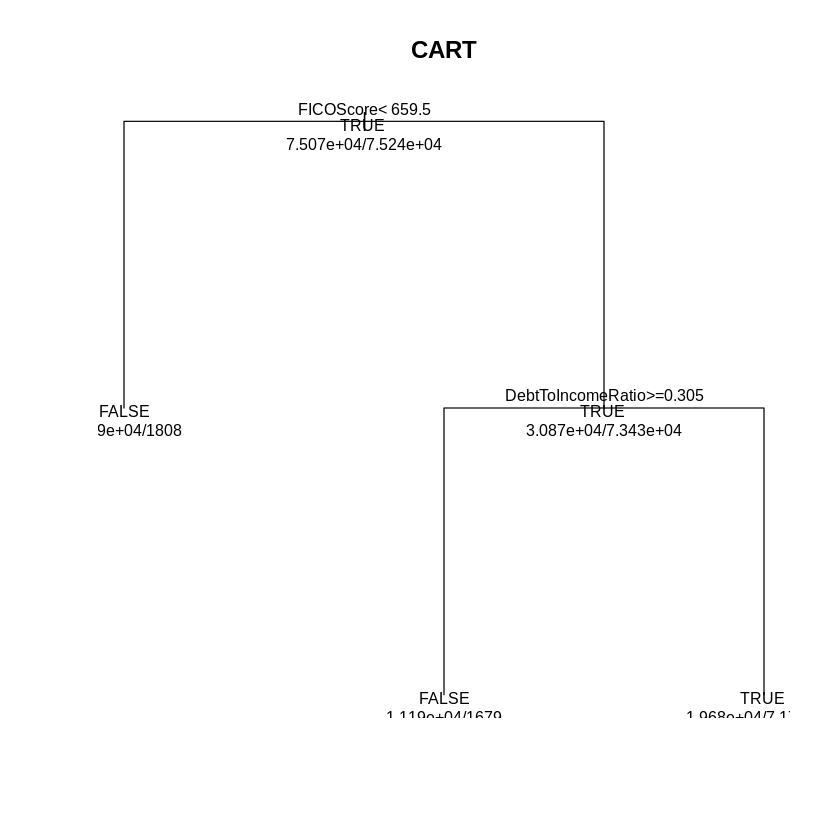

In [94]:
# Plot of tree
plot(fit, uniform=TRUE, main="CART")
text(fit, use.n=TRUE, all=TRUE, cex=.8)

# The first split was at a FICO score of 659.5, the next split was at a
# debt-to-income ratio of 0.305


In [95]:
install.packages("modeldata")
install.packages("C50")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



tibble [150,302 × 4] (S3: tbl_df/tbl/data.frame)
 $ DebtToIncomeRatio: num [1:150302] 0 0 0 0 0 0 0 0 0 0 ...
 $ FICOScore        : num [1:150302] 397 403 408 408 411 413 416 421 422 432 ...
 $ RequestAmount    : num [1:150302] 1000 500 1000 2000 5000 5000 6000 2000 12000 10000 ...
 $ Approval         : logi [1:150302] FALSE FALSE FALSE FALSE FALSE FALSE ...



Call:
C5.0.default(x = loans_training[, vars], y = loans_training$Approval, control
 = C5.0Control(minCases = 1000))

Classification Tree
Number of samples: 150302 
Number of predictors: 3 

Tree size: 8 

Non-standard options: attempt to group attributes, minimum number of cases: 1000



Call:
C5.0.default(x = loans_training[, vars], y = loans_training$Approval, control
 = C5.0Control(minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Wed Apr 20 01:08:44 2022
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (4 attributes) from undefined.data

Decision tree:

DebtToIncomeRatio > 0.31: FALSE (19884/1160)
DebtToIncomeRatio <= 0.31:
:...FICOScore <= 655: FALSE (35346/894)
    FICOScore > 655:
    :...FICOScore <= 669:
        :...RequestAmount > 23000: FALSE (1547/529)
        :   RequestAmount <= 23000:
        :   :...FICOScore <= 661: FALSE (3246/1418)
        :       FICOScore > 661: TRUE (5892/2056)
        FICOScore > 669:
        :...DebtToIncomeRatio <= 0.25: TRUE (75846/13356)
            DebtToIncomeRatio > 0.25:
            :...RequestAmount <= 25000: TRUE (7112/2658)
                RequestAmount > 25000: FALSE (1429/455)


Evaluation on training data (150302 cases):

	    Decision Tree   
	  ----------------  
	  S

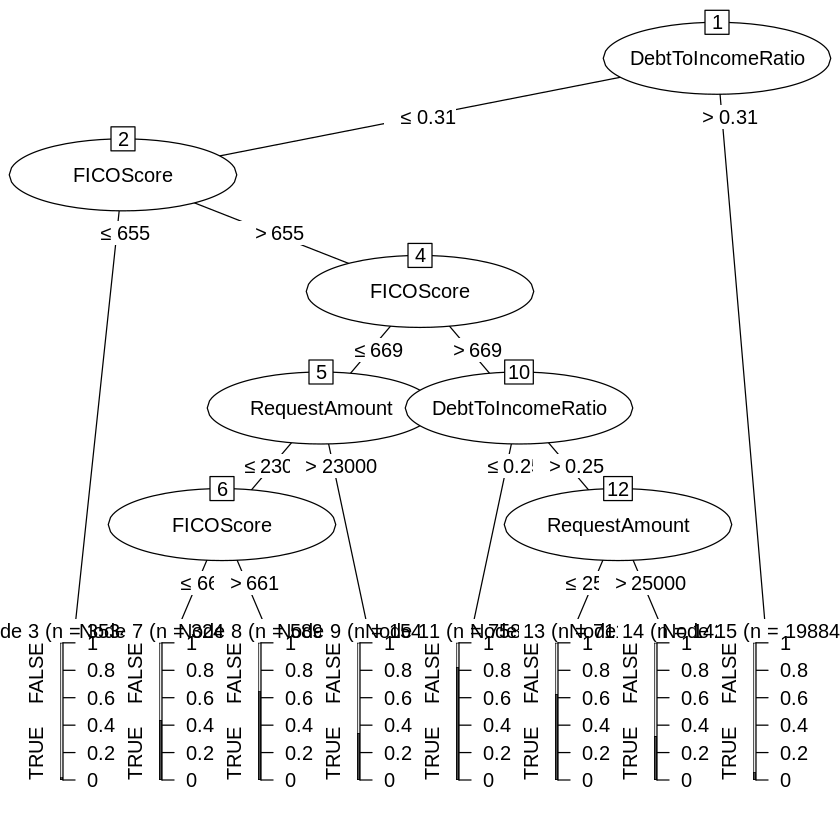

In [96]:
# C5.0 model with same predictors and target, with a minimum of 1000 cases per terminal node
# Create CART model using training data that predicts Approval based on Debt-to-income Ratio, FICO score, and Request Amount
library(modeldata)
library(C50)

# Create vector for predictors
vars <- c("DebtToIncomeRatio", "FICOScore", "RequestAmount")
str(loans_training[, c(vars, "Approval")])

loans_training$Approval <- as.factor(loans_training$Approval)

# Create model, specify 1000 minimum cases
tree_mod <- C5.0(x = loans_training[, vars], y = loans_training$Approval, control = C5.0Control(minCases = 1000))

# Visualize C5.0 model
plot(tree_mod)
tree_mod

# The first split was at a debt-to-income ratio of 0.31, the second split was at
# a FICO score of 655

# Summary
summary(tree_mod)


In [97]:
# Comparing the two models:
#
# Both models utilized FICO score and debt-to-income ratio the
# most as predictors, both models not using request amount nearly as much. A large
# difference was in the way the models started. The C5.0 model started with a split
# in debt-to-income ratio, whereas the CART model started with a split in
# FICO score. Overall, I found the C5.0 model easier to use and interpret. The plot
# was clearer and the summary was more informative.